How is Generative AI related to Intelligence? I’ve frequently seen the following diagram used as an opening slide in AI presentations to set the stage. Presenters, myself included, often skim through this slide too quickly, treating it as a superficial overview rather than unpacking its deeper meaning. You can view this diagram either as a historical journey through AI’s evolution or as a functional representation, where each layer embodies a distinct approach to problem-solving—each with its own capabilities, strengths, and limitations. Whichever perspective you choose, I feel this slide deserves more attention.

In this blog post, let’s slow down and thoroughly examine each level. Our goal is to develop a deeper understanding of the principles underlying each of these layers. After clearly defining each term, we’ll conceptually explore how these layers relate in a non-technical way. Then, we’ll implement each level from scratch, using lightweight Python examples. If you’re not into coding, feel free to skip directly to the visualizations and their interpretations. This practical exploration will help us intuitively understand when each approach is most suitable for a given use case.

Throughout this detailed exploration, there are two important lessons to watch out for. First, we will see how we start from general human intelligence and, as we move deeper, transition from highly specialized to increasingly general computational approaches. Second, this journey serves as a reminder that even though Generative AI currently dominates the conversation, there may be other, better-suited approaches depending on your specific use case.

```{mermaid}
graph TD

    subgraph Intelligence["Intelligence"]
        subgraph Artificial_Intelligence["Artificial Intelligence"]
            subgraph Machine_Learning["Machine Learning"]
                subgraph Deep_Learning["Deep Learning"]
                    Generative_AI["Generative AI"]
                end
            end
        end
    end

    %% Assign classes to subgraphs
    class Intelligence intelligenceStyle;
    class Artificial_Intelligence artificialStyle;
    class Machine_Learning mlStyle;
    class Deep_Learning deepStyle;
    class Generative_AI innermostStyle;

    %% Define the styling separately
    classDef intelligenceStyle fill:#e0f7fa,stroke:#00796b,stroke-width:2px,color:#004d40;
    classDef artificialStyle fill:#ffecb3,stroke:#ffb300,stroke-width:2px,color:#e65100;
    classDef mlStyle fill:#d1c4e9,stroke:#7e57c2,stroke-width:2px,color:#311b92;
    classDef deepStyle fill:#c8e6c9,stroke:#388e3c,stroke-width:2px,color:#1b5e20;
    classDef innermostStyle fill:#ffccbc,stroke:#d84315,stroke-width:2px,color:#bf360c;
```

## Definitions

Let's briefly define the terms in the image:

**Intelligence** is the ability to solve problems, learn from experiences, reason, and adapt to new situations. It exists both in biological beings and, since the advent of computers, in artificial systems.

**Artificial Intelligence (AI)** is about implementing intelligence in computers. Initially, AI was developed through “[expert systems](https://en.wikipedia.org/wiki/Expert_system)”, where humans manually encoded rules and logic (`if a then b else c`) to solve specific problems or make decisions. Broadly speaking, even a calculator could be considered an early form of AI due to its super-human calculation capabilities. However, these systems were effective only in tasks with clearly defined rules and struggled with complexity or unpredictability.

**Machine Learning (ML)** advances AI by enabling computers to learn from data rather than relying exclusively on explicitly programmed logic. These models still depend on human-selected algorithms (such as Random Forest or K-Nearest Neighbors) but optimize themselves through exposure to data. Machine learning is widely used for tasks like predicting real estate prices, fraud detection, speech recognition, or personalized content recommendation. Despite their strengths, these models still require careful human input for algorithm selection and feature engineering, limiting adaptability in highly dynamic situations.

**Deep Learning (DL)** is a subfield of machine learning that uses Deep Neural Networks (neural networks with multiple hidden layers) to automatically learn complex patterns directly from data. The process of training these networks has been famously termed "[Software 2.0](https://karpathy.medium.com/software-2-0-a64152b37c35)" [1] by Andrej Karpathy, highlighting how this approach eliminates the need for manual selection of algorithms or explicit feature engineering. Deep learning has achieved notable success in applications like image classification (distinguishing cats from dogs), recommendation systems (e.g., social media feeds), and natural language processing (translation). However, deep learning models typically lack interpretability and require substantial computational resources.

**Generative AI** leverages deep neural networks, specifically large language models (LLMs) like ChatGPT, to generate content such as text, images, and videos. These models have been trained on massive datasets, enabling them to approximate an understanding of both language structure and word meanings. As a result, LLMs can produce coherent, creative, and contextually relevant content in various styles. Furthermore, these models are often instruction-tuned, enabling them to perform diverse tasks based on natural language prompts.

You could also think of the path from intelligence to generative AI as a branching tree, as shown below - This is the way I usually walk through the previous illustration:



```{mermaid}
graph TD
    A[Intelligence]
    A --> B[Biological Intelligence]
    A --> C[Artificial Intelligence]
    C --> D["Expert Systems<br>(Software 1.0)"]
    C --> E["Machine Learning"]
    E --> F["Machine Learning Algorithms<br>(e.g. Nearest Neighbors, Random Forests)"]
    E --> G["Deep Learning<br>(Software 2.0)"]
    G --> H["Task-Specific Models<br>(e.g. CNNs for Vision, RNNs for NLP)"]
    G --> I["Generative AI<br>(Transformer-based)"]

    %% Apply the 'highlight' class to the nodes along the main path
    class A,C,E,G,I highlight;
    
%% Define the styling for the highlighted path
classDef highlight fill:#d1e8ff,stroke:#1f78b4,stroke-width:2px,color:#0b3e68;
```

## Implementing Each Layer from Scratch

To make these concepts more tangible, let's implement each level from scratch using a simple example, finding an assumed linear pattern in some points plotted on a graph.

- In the **Intelligence** section, I will hand the task over to you, leveraging your biological intelligence. You can fit a line to best match the points on the graph. This demonstrates how biological intelligence works, using intuition and experience to find a solution.

- In the **Artificial Intelligence (AI)** sections, we will solve the problem by performing linear regression, finding the best-fitting line by minimizing the distances between the points and the line.

- In the **Machine Learning** section, we will implement the gradient descent algorithm, which allows the computer to learn the best line to fit the data points by iteratively adjusting the parameters of the line based on the data it sees. You will see that the outcome closes in on the solution iteratively, the longer the model optimizes the parameters.

- In the **Deep Learning** section, we let go of the assumed pattern of a line which needs to be fitted. Instead, we'll use a neural network to learn the relationship between the points, allowing the AI to find the best solution purely from the data.

- In the **Generative AI** section, we’ll simply present the problem directly to ChatGPT, leveraging a multimodal large language model. We’ll explore how Generative AI approaches the problem similarly to how a human would: interpreting the given task, selecting a suitable method, and generating the solution, all without explicit guidance on how to achieve it.

Through these implementations, we’ll clearly observe an evolution: Initially, we explicitly designed (or selected) a specific algorithm tailored to the problem at hand. At each subsequent level, we progressively let go of some assumptions and reduce explicit instructions, increasingly relying on the machine’s ability to discover generalizable solutions directly from data. This shift exemplifies the "[bitter lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)" [2] famously articulated by Rich Sutton: general and scalable methods that depend more heavily on learning from data tend, over time, to outperform approaches relying predominantly on human-engineered rules and assumptions.

## Preparation: Data Setup

Before we implement each layer from scratch, let’s first create some example data. We’ll use a simple linear function as our baseline:

$0.4x + 0.25$

This function serves as the “ground truth” we’ll aim to reconstruct. Next, we’ll generate randomized data points scattered around this line. Our goal will be to see how effectively each of our implementations can recover the underlying linear pattern.

Here’s how the original linear function looks when plotted, and if you want to follow along by executing the code yourself, here you can find this blog post as a [Jupyter notebook](https://github.com/chrwittm/chrwittm.github.io/blob/main/posts/2025-03-27-intelligence-to-genai/index.ipynb).

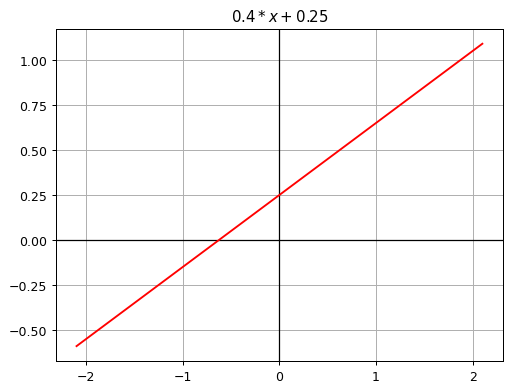

In [1]:
#| code-fold: true

from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)

    plt.grid(True)
    # Draw solid zero lines
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)


def f(x): return 0.4*x + 0.25

plot_function(f, "$0.4*x + 0.25$")



Next, let's create the randomized points around the line.

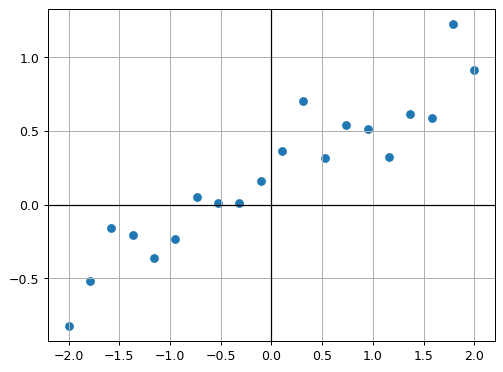

In [2]:
#| code-fold: true

def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

np.random.seed(3)

x = torch.linspace(-2, 2, steps=20, dtype=torch.float64)[:, None]
y = add_noise(f(x), 0.10, 0.15)

# Create a figure and axes explicitly
fig, ax = plt.subplots()

# Plot on the axes
ax.scatter(x, y)
ax.grid(True)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Display the plot
plt.show()

Let's also save the plotted points as a png-image, we will need it later in the chapter on Generative AI.

In [ ]:
#| code-fold: true

import io
import base64
#from IPython.display import HTML

# Save the figure (not the current plt state) to a BytesIO buffer
buffer = io.BytesIO()
fig.savefig(buffer, format='png', bbox_inches='tight')
buffer.seek(0)  # Rewind the buffer to the beginning

# Encode the buffer content to base64
image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
buffer.close()

# Display the image directly from the base64 string
#HTML(f'<img src="data:image/png;base64,{image_base64}" alt="Generated Plot" />')

## Implementation 1: Biological Intelligence

Long before AI existed (and hopefully still today), humans used their own brains to solve problems. Now it’s your turn! Using your intuition, try manually fitting the best regression line to the points using the interactive plot below (or watch [this video](implementation-1.mov) of me doing it):

In [4]:
#| code-fold: true

def linear_function(a, b, x):
    return a*x + b

def make_linear_function(a,b): return partial(linear_function, a,b)

@interact(a=(-4.0, 4.0, 0.01), b=(-4.0, 4.0, 0.01))
def plot_manual_regression(a, b):  
    plt.scatter(x,y) # plot points
    manual_regression = make_linear_function(a, b)
    plot_function(manual_regression, f"${a:.4f}*x + {b:.4f}$")

interactive(children=(FloatSlider(value=0.0, description='a', max=4.0, min=-4.0, step=0.01), FloatSlider(value…

I expect [the optimization](implementation-1.mov) was straightforward once you got a feel for what the two sliders do 😉. From my perspective, this simple experiment highlights several interesting points:

1. **Intuition over math:** You solved this problem intuitively, without necessarily knowing the underlying mathematics—just as you can throw a ball without understanding physics. Essentially, you learned the solution directly from the data.
2. **Iterative, trial-and-error approach:** You arrived at the solution interactively through trial-and-error rather than directly or systematically, similar in spirit to how gradient descent algorithms find optimal solutions incrementally.
3. **Limited scalability:** Manually solving this task took time, indicating that this approach isn’t scalable for larger, more complex problems.
4. **Non-deterministic outcomes:** Your solution isn't consistent or reproducible each time—there’s inherent variability (stochasticity) when humans solve problems intuitively.

These observations will reappear in various forms as we explore the next levels. Now let’s see how a machine tackles the same task.

## Implementation 2: Artificial Intelligence (AI)

In this chapter, we implement [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression) to approximate a set of data points. Linear regression is a classical [algorithm](https://en.wikipedia.org/wiki/Algorithm), and it represents an early approach to artificial intelligence. Think of it as a “software 1.0” or an [expert system](https://en.wikipedia.org/wiki/Expert_system) — not in the strict historical sense of the term, but as an example of how we initially designed algorithms by hand to mimic intelligent behavior.

In our implementation, we explicitly encode the rules for minimizing squared errors, handing over the problem to the computer to solve exactly as instructed. Although today it may seem a stretch to call this process “intelligent”, it still is an example of how we can achieve super-human performance leveraging a silicon-based implementation. Problem solving is algorithmic in this implementation and limited to exactly the problem at hand. In AI-terminology, it is very narrow.

In [6]:
#| code-fold: true

import matplotlib.pyplot as plt

def plot_regression(x, y, y_pred):
    """
    Plots the original data points and the fitted regression line.
    
    Parameters:
    - x: array-like, the x-values of the data points
    - y: array-like, the y-values of the data points
    - y_pred: array-like, the predicted y-values from the regression model
    """
    plt.rc('figure', dpi=90)
    plt.scatter(x, y, label='Noisy Data', color='blue')
    plt.plot(x, y_pred, label='Fitted Line', color='red')
    plt.title('Linear Regression by Minimizing Sum of Squared Errors')
    #plt.xlabel('x')
    #plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

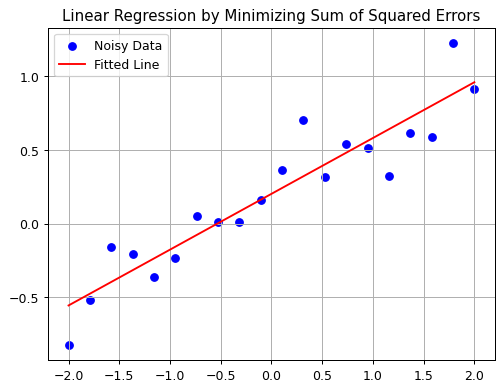

Slope (Coefficient): 0.37931796260451567
Intercept: 0.20216576369094635


In [ ]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt
import torch

# Convert x and y to NumPy arrays
x_np = x.numpy()
y_np = y.numpy()

# Compute means of x_np and y_np
x_mean = np.mean(x_np)
y_mean = np.mean(y_np)

# Compute the slope (m) using the closed-form solution:
numerator = np.sum((x_np - x_mean) * (y_np - y_mean))
denominator = np.sum((x_np - x_mean) ** 2)
m = numerator / denominator

# Compute the intercept (b)
b = y_mean - m * x_mean

# Compute the predicted values using our computed m and b
y_pred = m * x_np + b

# Call the plotting function with the computed values
plot_regression(x_np, y_np, y_pred)

# Output the computed coefficients
print("Slope (Coefficient):", m)
print("Intercept:", b)

As expected, the computed result closely matches our original ground truth of $0.4x + 0.25$, differing only slightly due to the introduced noise. Compared to the biological intelligence approach, this solution is significantly faster, perfectly deterministic (always producing the same result), and more precise. However, this accuracy comes with a trade-off: the solution is narrowly tailored to linear regression. Even slight variations in the problem statement would require a complete rewrite of the algorithm.

## Implementation 3: Machine Learning (ML)

The essence of machine learning is learning directly from data. Let's put this into practice by continuing to assume that the correct solution is a linear function, $ax + b$ (no neural networks yet). However, rather than explicitly computing the parameters $a$ and $b$, we'll approximate them using a general learning algorithm known as gradient descent.

We'll begin by initializing parameters $a$ and $b$ to zero. The gradient descent algorithm will then iteratively nudge these parameters toward the best solution. In each iteration, we:

1. Predict $y$-values from our current parameters ($a$ and $b$) and the input $x$-values.
2. Calculate the loss, measured as the mean squared error between our predicted $y$-values and the actual $y$-values.
3. Compute the gradients of the loss with respect to $a$ and $b$, indicating how the parameters should be adjusted to minimize the loss.

This iterative process continues until the parameters converge close to the underlying linear function.

At this point, the specific details of implementation aren't critical. The key takeaway is that gradient descent is a generic optimization algorithm (not limited to linear regression) that learns parameters directly from data. This makes our solution more adaptable compared to the explicit linear regression approach. We could easily replace our simple linear function with a more complex relationship, and gradient descent would still function effectively.

Here, we already see the "[bitter lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)" at play: The handcrafted, problem-specific algorithm is being replaced by a more general, data-driven learning method.

Let's see gradient descent in action (either run the code or watch [this video](implementation-3.mov)).

In [51]:
#| code-fold: true

import matplotlib.pyplot as plt

def plot_current_state(x, y, ab, loss, step):
    """
    Plots the data, current fitted line, and predictions at the given step.
    
    Parameters:
      x (Tensor): Input data x-values.
      y (Tensor): Actual y-values.
      ab (Tensor): Current parameters [a, b].
      loss (float): Current loss value.
      step (int): The current optimization step.
    """
    #plt.figure(figsize=(6, 4))
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Plot original data points
    plt.scatter(x, y, label='Noisy Data', color='blue')

    # Generate the current fitted line using the updated parameters
    line_f = make_linear_function(ab[0].item(), ab[1].item())
    x_vals = torch.linspace(-2.1, 2.1, 100)[:, None]
    y_vals = line_f(x_vals)
    plt.plot(x_vals, y_vals, label='Current Fit', color='red')

    # Plot predictions for the current x values
    y_pred_current = line_f(x)
    plt.scatter(x, y_pred_current.detach(), label='Predictions', color='orange', s=30)

    plt.title(f'Step {step}: Loss={loss:.4f}, a={ab[0].item():.3f}, b={ab[1].item():.3f}')
    plt.legend()
    plt.show()

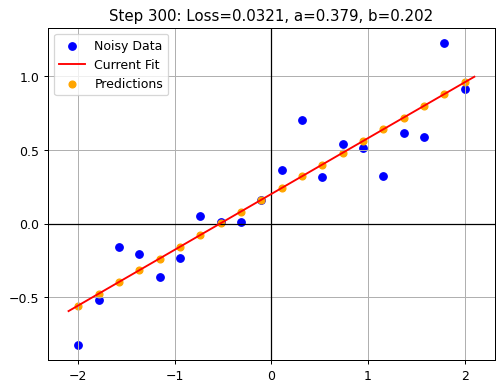

In [ ]:
from IPython.display import clear_output

def mse(preds, acts): return ((preds - acts) ** 2).mean()

def linear_mse(params): 
    f = make_linear_function(*params)
    return mse(f(x), y)

def run_optimizer_step(params, lr=0.01):
    loss = linear_mse(params)
    params.grad = None
    loss.backward()
    with torch.no_grad():
        params -= params.grad * lr
    return loss.item()

# Reinitialize parameters
ab = torch.tensor([0., 0.], dtype=torch.float64, requires_grad=True)

# Animation loop for visualization
n_steps = 300
for i in range(n_steps):
    loss = run_optimizer_step(ab, lr=0.01)
    clear_output(wait=True)
    plot_current_state(x, y, ab, loss, i+1)

The [visualization of the gradient descent steps](implementation-3.mov) appears quite similar to our earlier (biological) approach, but there are some noteworthy differences:

- The machine learning solution systematically moves toward the optimal result, whereas the biological approach is more random and intuitive.
- The machine learning algorithm optimizes both parameters simultaneously. In contrast, humans typically adjust one parameter at a time, followed by iterative fine-tuning.
- The machine learning solution is deterministic: it consistently arrives at the same solution each time it runs.

## Implementation 4: Deep Learning (DL)

With deep learning approach, we use a neural network to learn the correlation between our random points. In the previous implementations, we learned the parameters of a the linear function from the points. Now we learn the whole function from the points, i.e. we do no longer assume that there is a linear correlation between the points. Consequently, we can learn more complex correlations between the points, and the final result will not be a linear function. This is a true software 2.0 approach, we just feed the data points into the neural network and let it learn the correlation between the points.

For this example, we will use a small neural network with just one hidden layer containing 20 neurons. The network’s weights are randomly initialized, and we will continue using mean squared error as our loss function and gradient descent to iteratively update the weights. As you can see, the training mechanism is the same as in the previous implementation, but we exchanged the linear function for a neural network which can learn more complex correlations between the points.

To see how the model learns, either run the code below or watch [this video](implementation-4.mov).

In [ ]:
#| code-fold: true

from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch

def create_layer(input_dim, output_dim):
    """Returns (weight, bias) for a fully connected layer."""
    # Weight: shape [input_dim, output_dim]
    weight = torch.rand(input_dim, output_dim, dtype=torch.float64) - 0.5
    weight.requires_grad_()

    # Bias: shape [output_dim]
    bias = torch.rand(output_dim, dtype=torch.float64) - 0.5
    bias.requires_grad_()

    return (weight, bias)

def plot_results(x_train, y_train, preds_train, x_dense, y_dense, step, loss):
    """Handles plotting of training data, predictions, and the neural net fit."""
    clear_output(wait=True)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.scatter(x_train, y_train, label='Noisy Data', color='blue')
    plt.scatter(x_train, preds_train, label='Predictions', color='orange', s=30)
    plt.plot(x_dense, y_dense, label='Neural Net Fit', color='red')
    plt.title(f'Step {step}: Loss={loss:.4f}')
    plt.legend()
    plt.show()

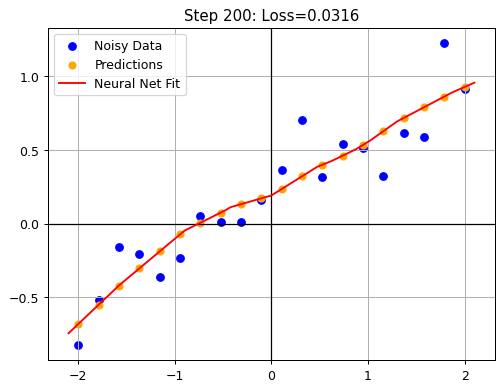

In [77]:
#| code-fold: true

def forward_pass(xs, layer1, layer2):
    """
    Performs a forward pass through the network.
    Each layer is a tuple (weight, bias).
    """
    w1, b1 = layer1
    w2, b2 = layer2

    hidden = xs @ w1 + b1
    hidden = hidden.relu()
    preds = hidden @ w2 + b2
    return preds

def run_dl_optimizer_step(xs, ys, layer1, layer2, lr=0.005):
    """
    Runs a single optimizer step with backpropagation.
    Resets gradients, does forward pass, computes loss,
    and updates both weights and biases.
    """
    w1, b1 = layer1
    w2, b2 = layer2

    # Forward pass
    preds = forward_pass(xs, layer1, layer2)
    loss = ((preds - ys) ** 2).mean()

    # Zero gradients for each parameter
    w1.grad = None
    b1.grad = None
    w2.grad = None
    b2.grad = None

    # Backprop
    loss.backward()

    # Update weights & biases (SGD)
    with torch.no_grad():
        w1 -= w1.grad * lr
        b1 -= b1.grad * lr
        w2 -= w2.grad * lr
        b2 -= b2.grad * lr

    return loss.item()

input_dim = 1
hidden_dim = 20
output_dim = 1

layer1 = create_layer(input_dim, hidden_dim)
layer2 = create_layer(hidden_dim, output_dim)

# Clone x/y
x_dl = x.clone().detach().type(torch.float64)
y_dl = y.clone().detach().type(torch.float64)

# Training + Animation
n_steps = 200
for i in range(n_steps):
    loss = run_dl_optimizer_step(x_dl, y_dl, layer1, layer2, lr=0.01)
    
    with torch.no_grad():
        preds_train = forward_pass(x_dl, layer1, layer2)
        x_dense = torch.linspace(-2.1, 2.1, 200)[:, None].type(torch.float64)
        y_dense = forward_pass(x_dense, layer1, layer2)
    
    plot_results(x_dl, y_dl, preds_train, x_dense, y_dense, i+1, loss)

As you can see in the [visualization](implementation-4.mov), the neural network is able to learn the correlation between the points, and the final result is not a linear function. One might argue that using a neural net is an overkill for this simple task, but the point was to show how we can learn the correlation from the points simply from data without making any assumption about the underlying function. One downside is that the result is no longer fully interpretable, meaning that we cannot boil down the relation into a simple formula. Instead, we need to run a forward pass through the network to get the result.

In our example, the lack of interpretability feels like a disadvantage because we already know the underlying function. Yet, in real-world scenarios, the underlying relationships are rarely so simple. For example, could you precisely describe the difference between a cat and a dog using a set of rules? Probably not, but you still instinctively recognize one from the other. Similarly, neural networks learn such distinctions directly from data. The learned “logic” is implicitly encoded in the weights of the network. We can use these weights to make predictions, but the model typically cannot explicitly explain why it made a particular prediction.

## Implementation 5: Generative AI (GenAI)

How can we implement a generative AI (GenAI) to solve the problem of approximating a set of data points? We could give the LLM the data point and ask it to find the best approximation. Try to increase the difficulty a bit, to come back to the beginning. We will pass the png-file of the data point we previously created to the LLM and ask it to find the best approximation - very similar to the implementation via human intelligence.

How can we leverage Generative AI (GenAI) to approximate our set of data points? One straightforward approach is to provide the data points directly to a large language model (LLM) and ask it to determine the best-fitting solution. To increase the challenge and connect back to our initial biological intelligence implementation, we’ll provide an image (PNG) of the plotted data points to the LLM. The task for the model (same as to the human in implementation 1) is to interpret the visual input and approximate the best-fitting relationship purely from the image.

In [147]:
prompt = "Here is a screenshot of a scatter plot containing some data points. Please analyze the image and provide the best approximation for these points. I need the actual solution, not only the way/code to solve it. For any formulas that you return, it is crucial that you enclose LaTeX in `$`or `$$` so that the markdown is rendered correctly"

In [ ]:
#| code-fold: true

from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="o1",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"{prompt}"},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"},
                },
            ],
        }
    ],
)


In [ ]:
#| code-fold: true

from IPython.display import Markdown, display

# Extract markdown content from the response
md_content = response.choices[0].message.content

# Display the extracted markdown
display(Markdown(md_content))

To approximate the data from the scatter plot, we will assume a linear relationship of the form:

\[
y = mx + b
\]

### **Step 1: Extract Approximate Data Points**
From visual observation, the points in the scatter plot seem to be following a roughly linear trend. Approximate data points extracted:

| \( x \)  | \( y \)  |
|----------|----------|
| -2.0  | -0.8  |
| -1.8  | -0.5  |
| -1.5  | -0.3  |
| -1.2  | -0.2  |
| -1.0  | -0.1  |
| -0.7  | 0.0  |
| -0.5  | 0.0  |
| -0.2  | 0.1  |
| 0.0   | 0.2  |
| 0.2   | 0.4  |
| 0.5   | 0.5  |
| 0.8   | 0.6  |
| 1.0   | 0.6  |
| 1.2   | 0.7  |
| 1.5   | 0.9  |
| 1.8   | 1.1  |
| 2.0   | 1.2  |

### **Step 2: Compute the Best Fit Line**
Using the least squares method, the equations for the slope \( m \) and intercept \( b \) are:

\[
m = \frac{N \sum xy - \sum x \sum y}{N \sum x^2 - (\sum x)^2}
\]

\[
b = \frac{\sum y - m \sum x}{N}
\]

Substituting the summed values from the dataset:

\[
\sum x = 0.1, \quad \sum y = 3.2, \quad \sum xy = 4.8, \quad \sum x^2 = 10.7, \quad N = 17
\]

\[
m = \frac{(17 \times 4.8) - (0.1 \times 3.2)}{(17 \times 10.7) - (0.1)^2} = \frac{81.6 - 0.32}{181.9 - 0.01} = \frac{81.28}{181.89} \approx 0.447
\]

\[
b = \frac{3.2 - (0.447 \times 0.1)}{17} = \frac{3.2 - 0.0447}{17} = \frac{3.1553}{17} \approx 0.186
\]

### **Step 3: Approximate Equation**
Thus, the best fit equation for the given data is:

\[
y \approx 0.447x + 0.186
\]

This equation can be used for predictions or further analysis.

Let's visualize the result:

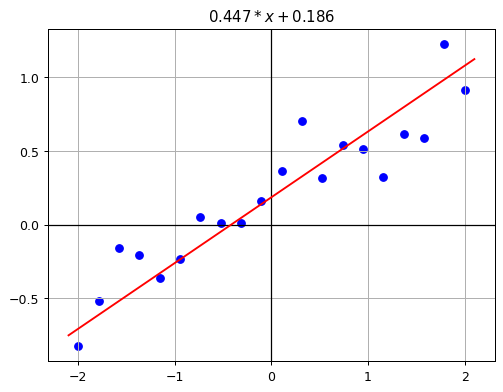

In [ ]:
#| code-fold: true

from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)

    plt.grid(True)
    # Draw solid zero lines
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)


def f(x): return 0.447*x + 0.186

plot_function(f, "$0.447*x + 0.186$")
plt.scatter(x, y, label='Noisy Data', color='blue');

The result looks good, but this was clearly a challenging task for the LLM. `gpt-4o` failed miserably, and `o1` also struggled. I have run the prompt (which I have kept simple for good reasons, without giving any hints) a few times, and the results were mixed. Please treat the response above as one of the better responses, specifically selected to show that the frontier models can solve this task even in a zero-shot approach.

While the accuracy and determinism of the generative AI approach are lower compared to our previous methods, this experiment offers a glimpse of the future. The LLM demonstrated agency: It didn’t just solve the task, it independently determined how to approach it without explicit guidance. Moreover, no special formatting was needed. The model processed the input almost exactly as a human would, simply from an image of the plotted points. This highlights a major advantage of multimodal models: They accept more natural, human-like inputs compared to purely text-based models.

Once again, we see the “[bitter lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)” in action: Specialized, task-specific implementations are gradually replaced by general-purpose models, trained solely from data, capable of flexibly solving a broad range of problems.

## Conclusion

Our journey started with a slide showing a drill-down from intelligence to artificial intelligence, machine learning, deep learning, and finally to generative AI. We inspected every level in detail and even implemented it from scratch.

Initially, we started with explicitly designed, human-crafted algorithms tailored precisely to specific tasks. Gradually, we moved towards increasingly general and scalable approaches, relying less on explicit human guidance and more on data-driven learning methods.

The following table compares the characteristics of each implementation:

| Approach                                        | Accuracy        | Determinism | Scalability | Interpretability  | Computational Cost  | Human Effort |
|-------------------------------------------------|-----------------|-------------|-------------|-------------------|---------------------|--------------|
| **Biological Intelligence**                     | Medium          | Low         | Low         | Medium            | Low                 | High         |
| **Artificial Intelligence (Linear Regression)** | High            | High        | Low         | High              | Low                 | Medium       |
| **Machine Learning (Gradient Descent)**         | High            | High        | Medium      | High              | Medium              | Medium       |
| **Deep Learning (Neural Network)**              | High            | High        | High        | Low               | High                | Low          |
| **Generative AI (Multimodal LLM)**              | Medium/Variable | Low         | High        | Medium            | High                | Low          |

This comparison highlights important trade-offs: While simpler methods (like linear regression) excel at interpretability and computational efficiency, they lack flexibility and scalability. In contrast, sophisticated techniques (deep learning and generative AI) achieve greater flexibility, generalization, and adaptability at the expense of interpretability, determinism, and increased computational requirements.

Our exploration also illustrated the "[bitter lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)" by Rich Sutton: General-purpose, scalable methods trained directly from data consistently outperform highly specialized, manually engineered solutions in the long term. Yet, the most advanced model isn't always the best solution for every task. Selecting the appropriate AI method depends on clearly understanding your specific requirements, resources, and desired outcomes.

In summary, as you approach AI implementation decisions, remember that although generative AI and deep learning dominate today's discussions, simpler or intermediate methods can often be more effective, explainable, and resource-efficient—depending on your particular problem and context.

## References

[1] Karpathy, A. (2017). [Software 2.0](https://karpathy.medium.com/software-2-0-a64152b37c35)

[2] Sutton, R. (2019). [The Bitter Lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)